# 🏦 Bank Marketing Dataset — Project Overview

## Introduction
The **Bank Marketing Dataset** is a well-known dataset originally provided by the [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/dataset/222/bank+marketing).  
It contains data from a series of **direct marketing campaigns** (phone calls) conducted by a Portuguese banking institution.  
The primary objective of these campaigns was to persuade customers to **subscribe to a term deposit product** — a type of fixed-term savings account.

This dataset is widely used in **machine learning** and **data analytics** tasks to explore how marketing, demographic, and socio-economic factors influence customer decisions.

---

## Dataset Information
- **Source:** UCI Machine Learning Repository – Bank Marketing Dataset  
- **Records:** 45,211 (for the full version)  
- **Features:** 17 input features + 1 target variable  
- **Type of Problem:** Classification (Binary)  
- **Target Variable:**  
  - `y` → Whether the client subscribed to a term deposit (`yes` or `no`)

---

## Feature Overview
The dataset includes three types of features:
- **Client Information:** age, job, marital status, education, balance, etc.  
- **Contact Information:** contact communication type, last contact duration, number of contacts, etc.  
- **Campaign & Economic Indicators:** previous marketing outcomes, employment rate, consumer confidence index, etc.

These features together help identify patterns that determine which clients are **most likely to respond positively** to a marketing campaign.

---

## Project Objective
The main goal of this project is to:
- **Analyze customer characteristics** and **campaign performance**,  
- **Preprocess the dataset** for machine learning models,  
- **Develop predictive models** that can accurately classify whether a customer will **subscribe to a term deposit**,  
- And finally, **generate insights** that can help the bank:
  - Optimize marketing strategies,
  - Reduce campaign costs,
  - Increase conversion rates.

---

## Expected Outcome
By applying **data preprocessing**, **exploratory data analysis (EDA)**, and **machine learning models**,  
we aim to create a data-driven framework for **intelligent targeting** — identifying the right customers at the right time with the right message.

---

*This project combines marketing analytics and machine learning to enhance decision-making and improve the effectiveness of future campaigns.*


**Data Dictionary**:

| Column     | Description                                                                                     | Type        |
|------------|-------------------------------------------------------------------------------------------------|------------|
| Age        | Age of the customer                                                                             | Numerical  |
| Job        | Job of the customer                                                                             | Categorical|
| Marital    | Marital status of the customer                                                                 | Categorical|
| Education  | Customer education level                                                                        | Categorical|
| Default    | Has credit in default?                                                                          | Categorical|
| Housing    | If customer has a housing loan                                                                 | Categorical|
| Loan       | Has a personal loan                                                                             | Categorical|
| Balance    | Customer's individual balance                                                                   | Numerical  |
| Contact    | Communication type (e.g., telephone, cellular)                                                 | Categorical|
| Month      | Last contact month of the year                                                                  | Categorical|
| Day        | Last contact day of the week                                                                    | Numerical  |
| Duration   | Last contact duration, in seconds                                                               | Numerical  |
| Campaign   | Number of contacts performed during this campaign for this client                               | Numerical  |
| Pdays      | Number of days since the client was last contacted in a previous campaign                        | Numerical  |
| Previous   | Number of contacts performed before this campaign for this client                                | Numerical  |
| Poutcome   | Outcome of the previous marketing campaign                                                      | Categorical|
| Deposit    | Has the client subscribed to a term deposit? **(Target variable)**                               | Categorical|

*Notes for Project*

1. **Target Variable:** `Deposit` (yes/no) → what models will predict.
2. **Categorical Columns:** `Job`, `Marital`, `Education`, `Default`, `Housing`, `Loan`, `Contact`, `Month`, `Poutcome` → need **encoding** (OneHot or LabelEncoder).
3. **Numerical Columns:** `Age`, `Balance`, `Day`, `Duration`, `Campaign`, `Pdays`, `Previous` → can be used as-is, scaling optional.
4. **Imbalanced Target:** Usually `Deposit = yes` is less frequent → use metrics like **F1-score, ROC-AUC** or techniques like **class_weight**.


##Importing Libraries

In [12]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


## Importing the dataset

In [13]:
#import dataset

df = pd.read_csv('bank.csv')

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [15]:
df.shape

(11162, 17)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [17]:
#find percentage of missing values for each column
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


##Data Preprocessing

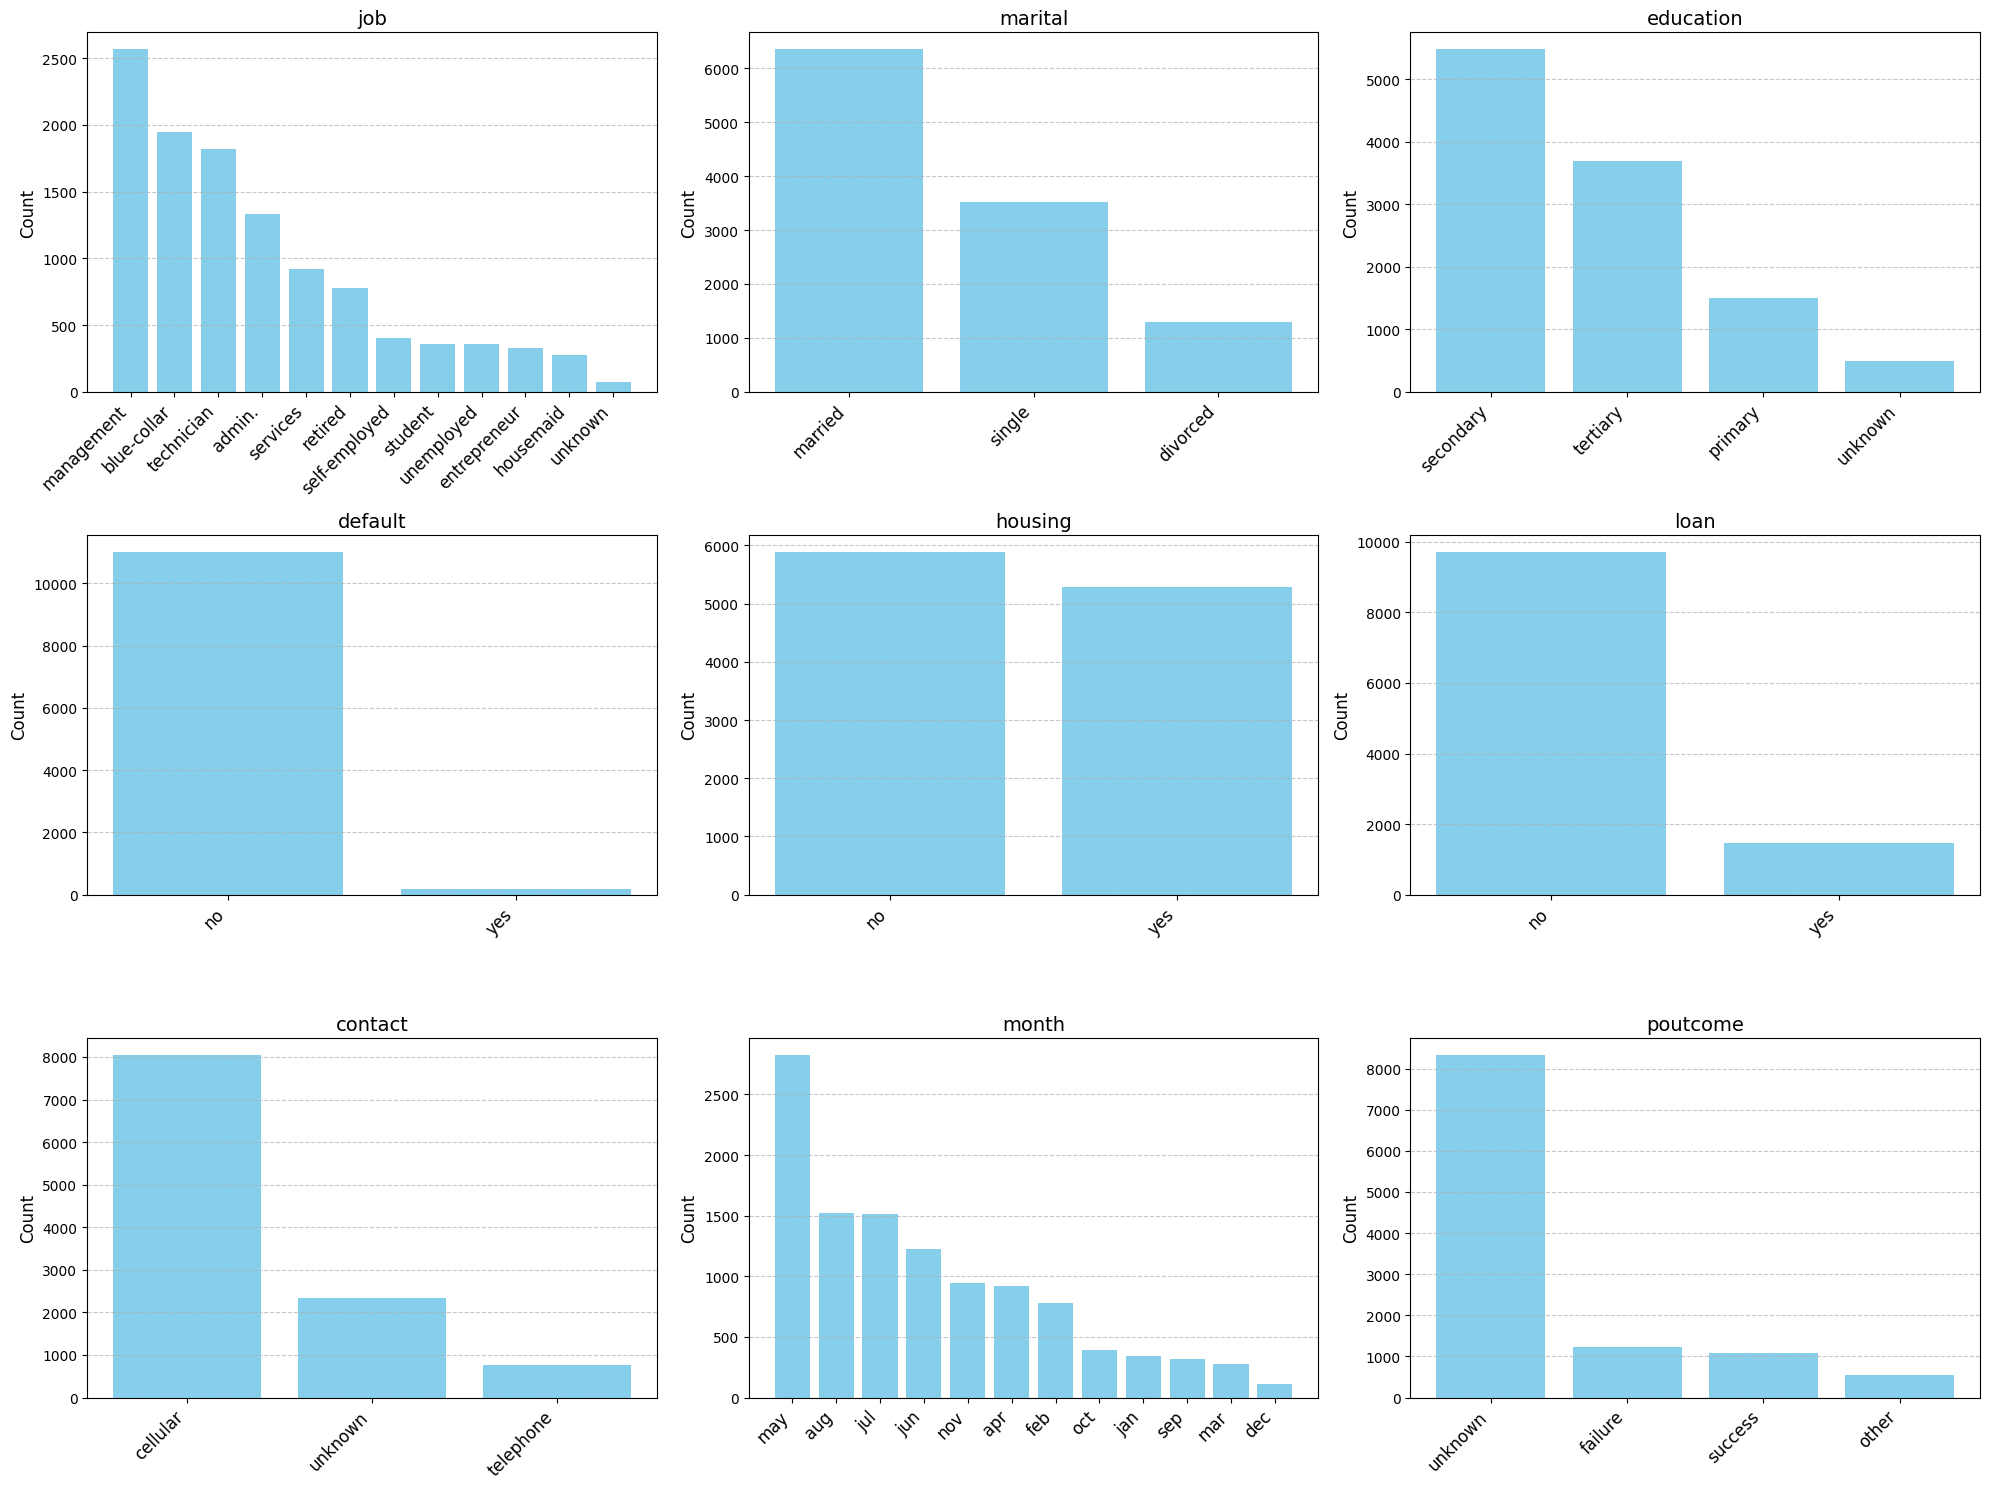

In [18]:
# List of categorical columns to plot
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each categorical column and plot its value counts
for i, col in enumerate(cat_columns):
    value_counts = df[col].value_counts()  # Count frequency of each category
    x_pos = np.arange(len(value_counts))   # X positions for the bars

    axs[i].bar(x_pos, value_counts.values, color='skyblue')  # Create bar plot
    axs[i].set_title(col, fontsize=14)                        # Set subplot title
    axs[i].set_xticks(x_pos)                                  # Set x-tick positions
    axs[i].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=12)  # Set x-tick labels
    axs[i].set_ylabel('Count', fontsize=12)                  # Set y-axis label
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)         # Add horizontal grid lines

# Remove any unused subplots if number of columns < 9
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout so labels and titles don't overlap
plt.tight_layout()
plt.show()

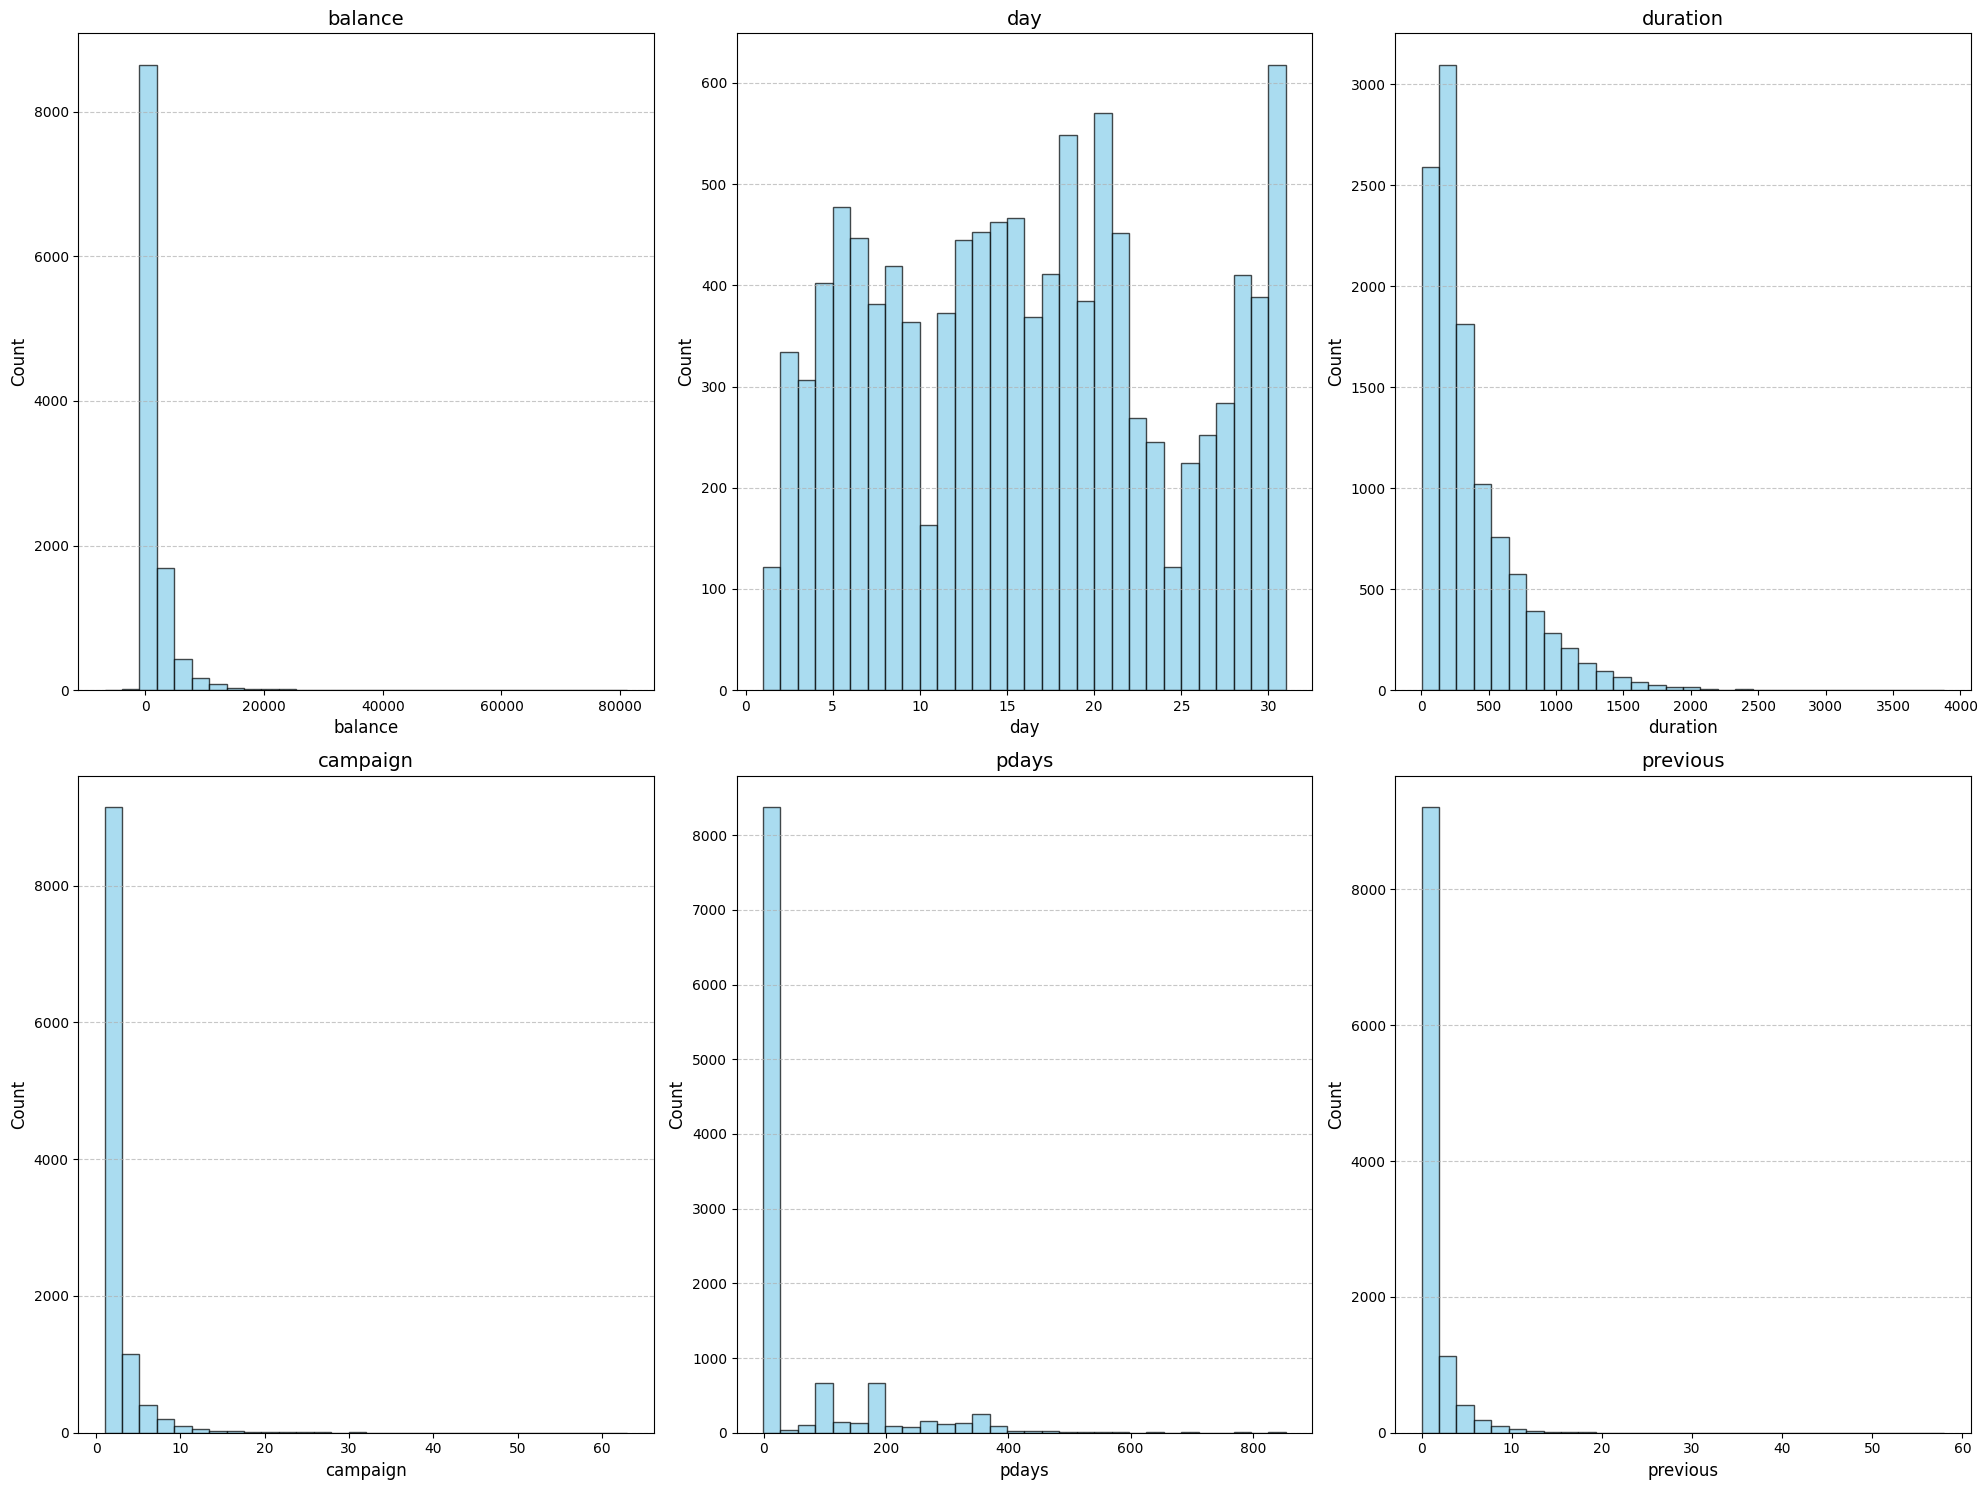

In [19]:
# List of numerical columns to plot
num_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.flatten()  # Flatten 2D array for easier indexing

# Loop through each numerical column and plot histogram
for i, col in enumerate(num_columns):
    axs[i].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axs[i].set_title(col, fontsize=14)
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('Count', fontsize=12)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots if number of columns < number of subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Deposit value counts'}, xlabel='deposit'>

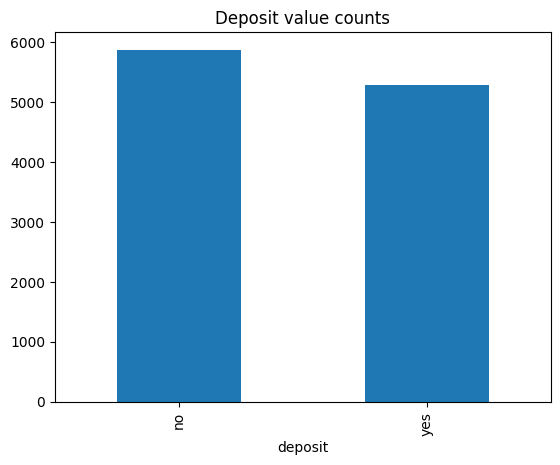

In [20]:
value_counts = df['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.

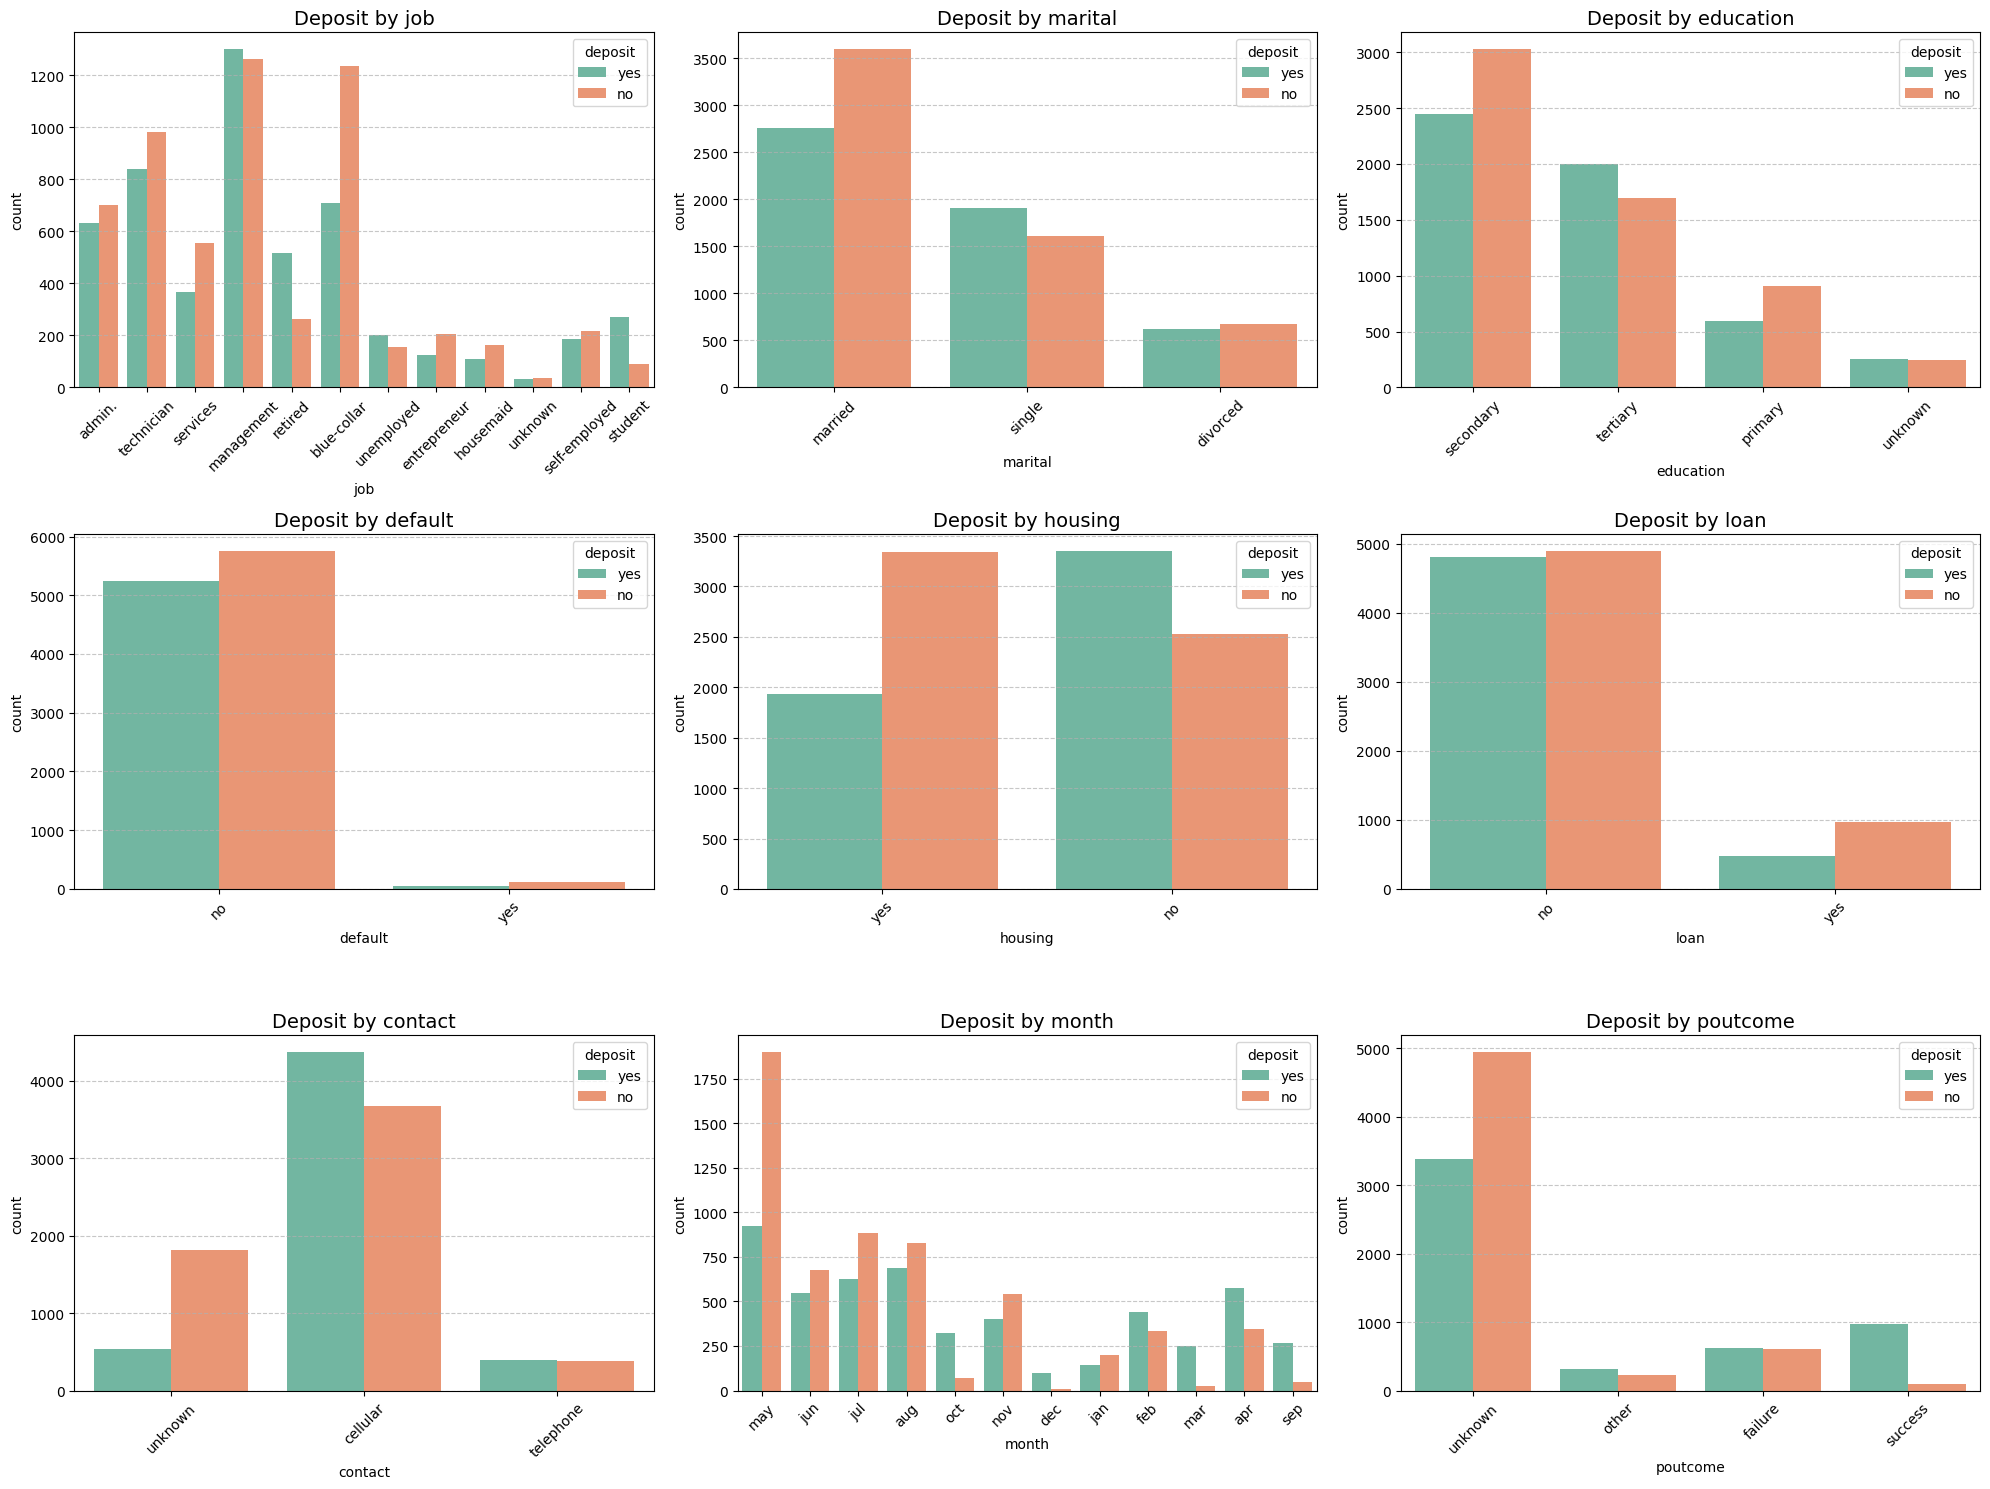

In [21]:
# List of categorical columns to compare with target
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

# Set figure size
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()  # Flatten 2D array for easier indexing

# Loop through categorical columns and plot count of 'Deposit' per category
for i, col in enumerate(cat_columns):
    sns.countplot(data=df, x=col, hue='deposit', ax=axs[i], palette='Set2')
    axs[i].set_title(f'Deposit by {col}', fontsize=14)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove unused subplots if any
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

**Insights from Categorical Analysis of `Deposit`**

From the countplots of `Deposit` versus categorical variables, we can observe:

1. **Job**
   - Customers with `'blue-collar'` and `'services'` jobs have a lower likelihood of subscribing to a term deposit.
   - Conversely, `'management'` and `'technician'` roles appear more likely to subscribe.

2. **Marital Status**
   - Married customers are slightly less likely to subscribe compared to single customers.

3. **Contact Type**
   - Customers contacted via `'cellular'` show a lower subscription rate for term deposits than other contact types.

> **Note:** These patterns can help guide feature engineering and model interpretation, especially when using ensemble classifiers like Random Forest or XGBoost, which can capture nonlinear relationships.


**Insights from the Diagrams**

Looking at the diagrams above, we can conclude that:

- **Balance and Age:** People who subscribed for a term deposit tend to have greater **balance** and **age** values.  
- **Campaign Contacts:** People who subscribed for a term deposit tend to have **fewer contacts during this campaign**.


/tmp/ipython-input-3919204400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='deposit', y=col, ax=axs[i], palette='Set2')
/tmp/ipython-input-3919204400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='deposit', y=col, ax=axs[i], palette='Set2')
/tmp/ipython-input-3919204400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='deposit', y=col, ax=axs[i], palette='Set2')
/tmp/ipython-input-3919204400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is depr

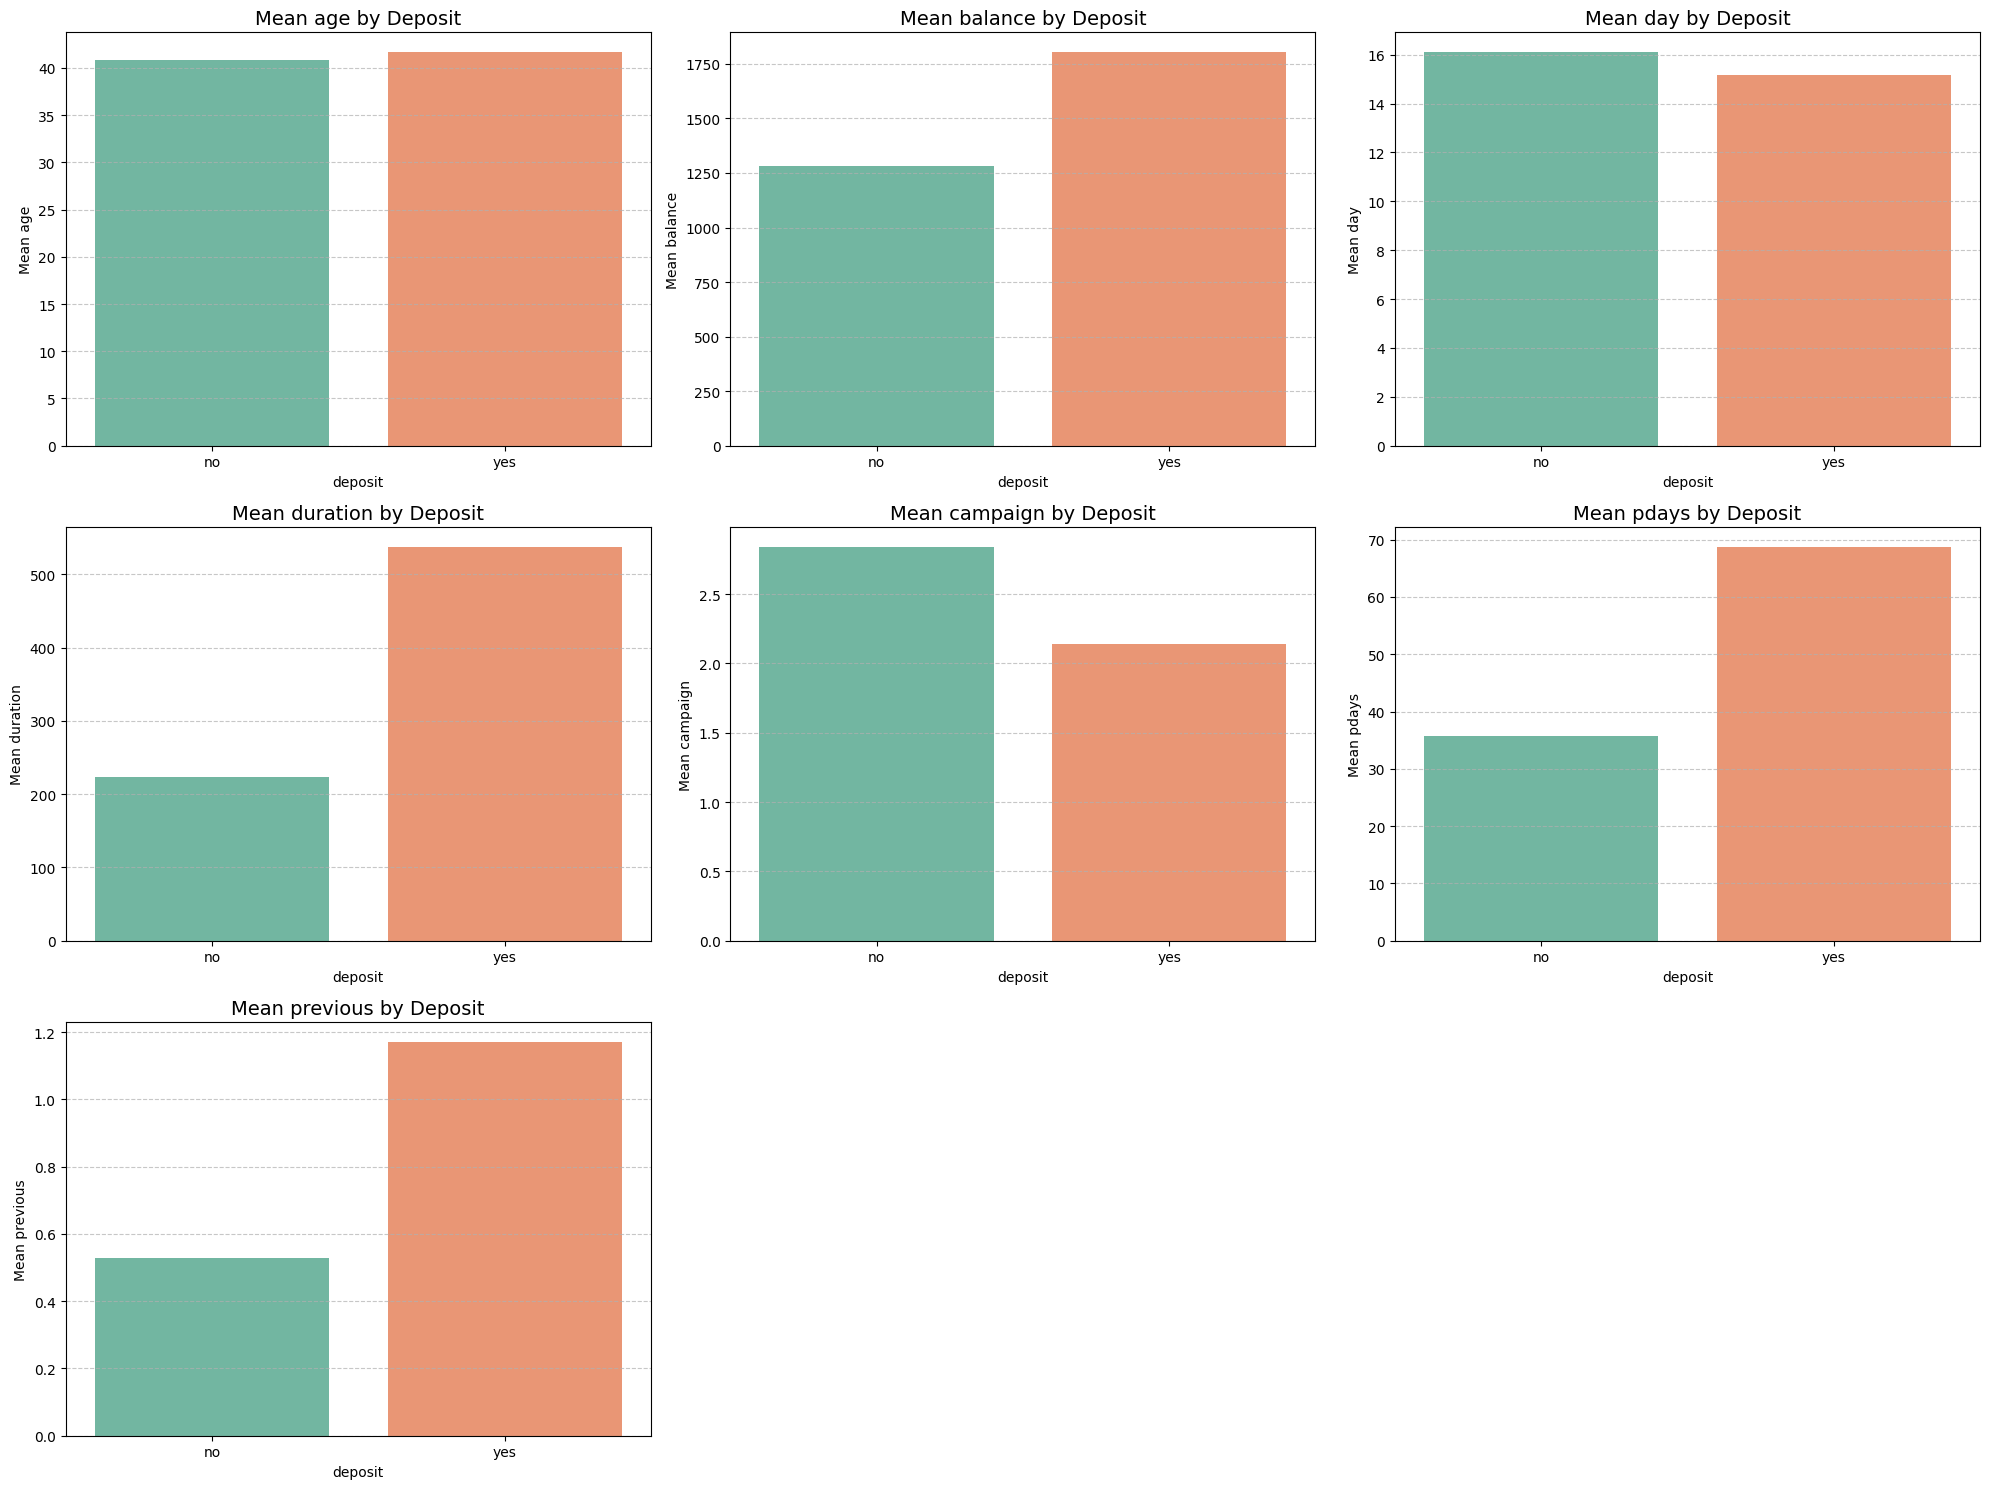

In [22]:
# List of numerical columns
num_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Set figure size
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

# Loop through numerical columns and plot mean value per deposit category
for i, col in enumerate(num_columns):
    mean_values = df.groupby('deposit')[col].mean().reset_index()
    sns.barplot(data=mean_values, x='deposit', y=col, ax=axs[i], palette='Set2')
    axs[i].set_title(f'Mean {col} by Deposit', fontsize=14)
    axs[i].set_ylabel(f'Mean {col}')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

**Analysis of Mean Features by Deposit**

| Feature | Customers who bought deposit (yes) | Customers who did not buy deposit (no) | Analysis / Meaning |
|---------|-----------------------------------|--------------------------------------|------------------|
| Mean Age | ~40 years | ~40 years | Age alone is **not a strong differentiator** for predicting deposit subscription. |
| Mean Balance | ~1750 | ~1350 | Customers who subscribe tend to have **higher account balance**, indicating financial stability as a positive signal. |
| Mean Day | ~15 | ~15 | The day of the month when contact occurred does **not significantly affect** the response. |
| Mean Duration | ~500 sec | ~220 sec | **Strongest differentiator**, but indicates **data leakage**. Duration is much longer for positive responses and should be **excluded from the final model**. |
| Mean Campaign | ~2.1 | ~2.8 | Customers who subscribe tend to receive **fewer contacts during the current campaign**, suggesting excessive contact may have a negative effect. |
| Mean Pdays | ~70 days | ~35 days | Customers who respond positively have **longer time since last contact**, showing effectiveness of reaching “older” or less recently contacted clients. |
| Mean Previous | ~1.2 | ~0.6 | Customers who subscribe have **more previous campaign contacts**, likely indicating **higher engagement and conversion success**. |


In [23]:
""" Steps Overview:

1️. **Copy the original DataFrame**
   - To avoid modifying the raw dataset.

2️. **Convert 'yes'/'no' Columns to Boolean**
   - Maps 'yes' → 1, 'no' → 0
   - Adds new columns with suffix `_bool`
   - Drops the original text columns.

3️. **Detect and Encode Categorical Columns Automatically**
   - Detects all columns with dtype 'object' or 'category'
   - Label-encodes them temporarily
   - Applies OneHotEncoder (drop='first') to prevent dummy variable trap
   - Concatenates the encoded columns to the main DataFrame
   - Drops the original text (categorical) columns.

4️. **Drop Irrelevant Columns**
   - Removes columns such as 'pdays' if they exist.

5️. **Handle Outliers Using IQR**
   - For all numerical columns:
     - Calculates Q1, Q3, and IQR.
     - Defines lower and upper limits.
     - Replaces values outside these limits with the mean of valid data.

6️. **Return the Cleaned DataFrame**
   - All columns will be numeric and ready for machine learning models.
"""

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
def clean_data_auto_outliers(df):
    # 1️. Make a copy
    cleaned_df = df.copy()

    # 2️.Convert 'yes'/'no' columns to boolean
    bool_cols = [col for col in cleaned_df.columns if cleaned_df[col].isin(['yes', 'no']).all()]
    for col in bool_cols:
        cleaned_df[col + '_bool'] = cleaned_df[col].map({'yes': 1, 'no': 0})
    cleaned_df.drop(columns=bool_cols, inplace=True)

    # 3️. Detect categorical columns automatically
    cat_cols = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()

    if len(cat_cols) > 0:
        # Label encode + OneHot encode automatically
        le_encoded = []
        for col in cat_cols:
            le = LabelEncoder()
            cleaned_df[col + '_le'] = le.fit_transform(cleaned_df[col].astype(str))
            le_encoded.append(col + '_le')

        ohe = OneHotEncoder(drop='first', sparse_output=False)
        ohe_array = ohe.fit_transform(cleaned_df[le_encoded])
        ohe_df = pd.DataFrame(
            ohe_array,
            columns=ohe.get_feature_names_out(le_encoded),
            index=cleaned_df.index
        )

        cleaned_df.drop(columns=le_encoded, inplace=True)
        cleaned_df = pd.concat([cleaned_df, ohe_df], axis=1)

    # 4️. Drop irrelevant columns if they exist
    if 'pdays' in cleaned_df.columns:
        cleaned_df.drop(columns=['pdays'], inplace=True)

    # 5️. Handle outliers in numerical columns
    num_cols = cleaned_df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q3 + 1.5 * IQR
        lower = Q1 - 1.5 * IQR
        mean_val = cleaned_df.loc[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper), col].mean()
        cleaned_df[col] = np.where(
            (cleaned_df[col] > upper) | (cleaned_df[col] < lower),
            mean_val,
            cleaned_df[col]
        )
    # Drop original categorical (object) columns after encoding
    cleaned_df.drop(columns=cat_cols, inplace=True)
    return cleaned_df


In [24]:
#clean the dataset
cleaned_df = clean_data_auto_outliers(df)
cleaned_df.head()

,age,balance,day,duration,campaign,previous,default_bool,housing_bool,loan_bool,deposit_bool,...,month_le_5,month_le_6,month_le_7,month_le_8,month_le_9,month_le_10,month_le_11,poutcome_le_1,poutcome_le_2,poutcome_le_3
0,59.0,2343.0,5.0,311.858541,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56.0,45.0,5.0,311.858541,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.0,1270.0,5.0,311.858541,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55.0,2476.0,5.0,579.000000,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54.0,184.0,5.0,673.000000,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

## Is Feature Scaling Needed for Tree-Based Models?

>  **No — Feature scaling is not required for tree-based algorithms** such as  
> **Decision Tree**, **Random Forest**, **Gradient Boosting**, **XGBoost**, or **LightGBM**.

---

### Why?
Tree-based models split data using **thresholds** (e.g., `age < 35`, `balance >= 5000`),  
so they only care about the **order** of feature values — not their magnitude or distance.  
Scaling therefore has no effect on model performance.

---

### When Scaling *Is* Needed
Scaling is important for models that rely on **distance** or **gradient magnitude**, such as:
- K-Nearest Neighbors (KNN)  
- Support Vector Machines (SVM)  
- Logistic / Linear Regression  
- PCA  

---

###  Summary

| Model Type | Need Scaling? | Reason |
|-------------|----------------|--------|
| Decision Tree | No | Splits based on thresholds |
| Random Forest | No | Ensemble of trees |
| Gradient Boosting / XGBoost |  Rarely | Only for numerical stability |
| KNN / SVM / Logistic Regression |  Yes | Distance-based models |

---

**Conclusion:**  
Tree-based models are scale-invariant — feature scaling is *not* required before training.


##Analysis of Correlation

In [26]:
df_numeric = df[num_columns]
corr = df_numeric.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


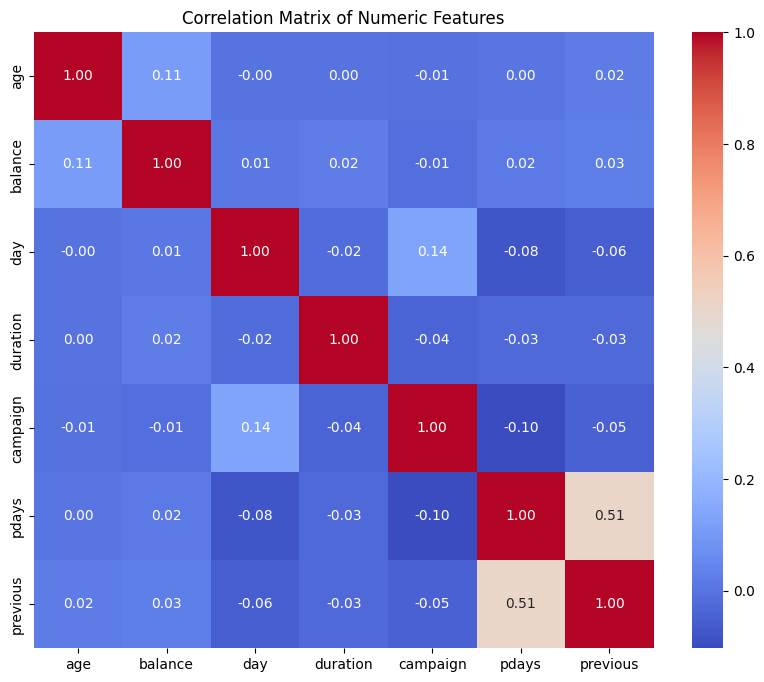

In [27]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

## spliting dataset into a train set and test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##Evaluation

### LazyPredict — Fast Model Benchmarking Library

`LazyPredict` is a powerful Python library that allows you to **train and compare multiple machine learning models automatically** with just a few lines of code.  
It’s designed to help you quickly identify the best-performing algorithms for your dataset **without writing repetitive boilerplate code**.

---

### Key Features
- Automatically trains and evaluates **30+ popular ML models** (Logistic Regression, RandomForest, SVM, XGBoost, etc.)
- Returns a clean **DataFrame with performance metrics** such as:
  - Accuracy
  - Balanced Accuracy
  - ROC-AUC
  - F1 Score
  - Training Time
- Can also return **model predictions** with `predictions=True`

---

### When to Use It
Use `LazyPredict` during the **Exploratory Model Benchmarking** phase —  
to get a quick overview of which algorithms perform best on your dataset **before fine-tuning or hyperparameter optimization**.

---

### Installation
To install LazyPredict, run:

```bash
pip install lazypredict


In [29]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions = True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4001, number of negative: 4370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 8371, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477960 -> initscore=-0.088219
[LightGBM] [Info] Start training from score -0.088219


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.81,0.82,0.82,0.81,0.28
XGBClassifier,0.80,0.80,0.80,0.80,0.37
RandomForestClassifier,0.80,0.80,0.80,0.80,1.29
AdaBoostClassifier,0.78,0.78,0.78,0.78,0.47
BaggingClassifier,0.78,0.77,0.77,0.78,0.44
SVC,0.77,0.77,0.77,0.77,5.19
NuSVC,0.77,0.77,0.77,0.77,10.27
LogisticRegression,0.77,0.76,0.76,0.77,0.08
CalibratedClassifierCV,0.77,0.76,0.76,0.77,0.22


### Purpose of Using LazyPredict in This Project

The main goal of using **LazyPredict** in this project is to **quickly benchmark multiple machine learning models** on the Bank Marketing dataset.  

By leveraging LazyPredict, we can:

- **Compare dozens of ML models instantly** without writing repetitive code
- **Identify the most promising models** for further tuning and deployment
- **Save time during the exploratory modeling phase**
- Generate a **clear performance summary** (accuracy, F1 score, ROC-AUC, training time) for all models
- Make **informed decisions** about which models to focus on for the final pipeline

> In short: LazyPredict helps speed up the early stages of model selection and provides a **fast, reliable overview** of which algorithms are likely to perform well on this dataset.


In [30]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose=-1)
model.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [31]:
# Predict on test set
y_pred = model.predict(X_test)

In [32]:
y_prob = model.predict_proba(X_test)[:, 1]  # probability for class 1 (yes)


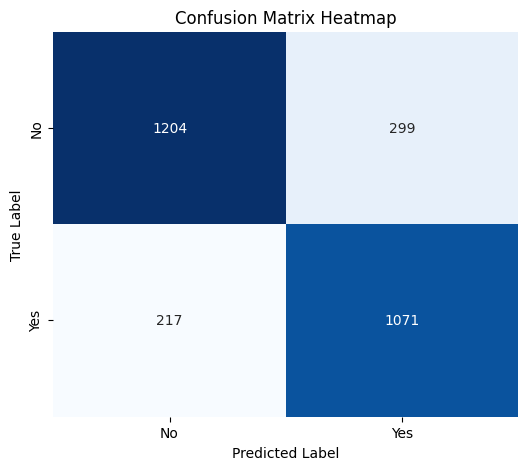

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1503
         1.0       0.78      0.83      0.81      1288

    accuracy                           0.82      2791
   macro avg       0.81      0.82      0.81      2791
weighted avg       0.82      0.82      0.82      2791



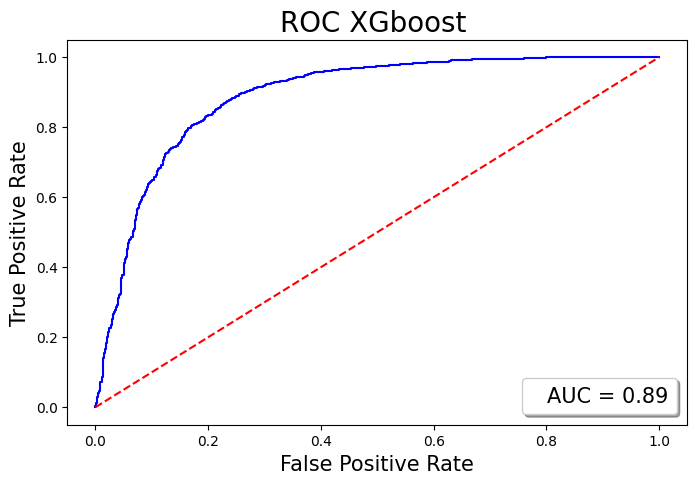

In [59]:
from sklearn.metrics import roc_auc_score,auc, roc_curve
plt.figure(figsize = (8, 5))

probs = model.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, _ = roc_curve(y_test, preds)
roc_aucxgb = auc(fprxgb, tprxgb)

plt.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC XGboost ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', fontsize=15, fancybox=True, shadow=True, frameon=True,handlelength=0)
plt.show()

## Bank Marketing Campaign Recommendations

1. **Optimal Months:** Focus marketing during March, September, October, and December. Avoid May, which had low effectiveness.

2. **Seasonality:** Target campaigns in **fall and winter**, when subscriptions are higher.

3. **Campaign Calls:** Limit calls to **max 3 per client** to avoid rejection.

4. **Age Focus:** Prioritize clients in their **20s or younger** and **60s or older** (highest subscription likelihood).

5. **Occupation:** Target **students** and **retired individuals**, who are most likely to subscribe.

6. **Balance & Loans:** Focus on clients with **average/high balances** and **no house loans**, as they are more likely to subscribe.

7. **Engagement:** Use **questionnaires during calls** to increase call duration and engagement.

8. **High Duration Clients:** Target calls with **duration above 375 seconds**, as these have a **78% subscription likelihood**.

> Combining these strategies will simplify the target audience and increase the effectiveness of the next marketing campaign.
